In [2]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
import cv2
import splitfolders
from tensorflow import keras 
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

The optimizers we will be using :
* SGD
* SGD with momentum
* NADAM
* Adagrad
* Adadelta
* RMSprop
* Adam

Refer to the analyticsvidhya blog - *comprehensive guide on deep learning optimizers*

In [4]:
splitfolders.ratio('dataset', output="dataset_split", seed=736, ratio=(.8, .2)) 

Copying files: 840 files [00:01, 706.51 files/s]


In [5]:
#Loading train images
X_train = []
y_train = []

folder_path = './dataset_split/train/'
all_image_paths = []


for folder in os.listdir(folder_path):
    folder_full_path = os.path.join(folder_path, folder)

    for file in os.listdir(folder_full_path):
        file_full_path = os.path.join(folder_full_path, file)

        if file.endswith('.jpg') or file.endswith('.tif'):
            img = cv2.imread(file_full_path)
            all_image_paths.append(file_full_path)
            X_train.append(img)
            y_train.append(folder)

In [6]:
#Loading train images
X_val = []
y_val = []

folder_path = './dataset_split/val/'
all_image_paths = []


for folder in os.listdir(folder_path):
    folder_full_path = os.path.join(folder_path, folder)

    for file in os.listdir(folder_full_path):
        file_full_path = os.path.join(folder_full_path, file)

        if file.endswith('.jpg') or file.endswith('.tif'):
            img = cv2.imread(file_full_path)
            all_image_paths.append(file_full_path)
            X_val.append(img)
            y_val.append(folder)

In [7]:
print(X_train[4].shape)

(256, 256, 3)


In [8]:
X_train =np.array(X_train)
y_train = np.array(y_train)

X_val = np.array(X_val)
y_val = np.array(y_val)

In [9]:
X_train = X_train/255.
X_val = X_val/255.

In [10]:
from sklearn.preprocessing import LabelEncoder
lbl_enc = LabelEncoder()
y_train = lbl_enc.fit_transform(y_train)
y_val = lbl_enc.fit_transform(y_val)
y_val

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5], dtype=int64)

In [11]:
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)

In [12]:
model = Sequential()
model.add(Conv2D(16,(3,3), activation = "relu", padding = "same", input_shape = (256, 256, 3)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(32,(3,3), activation = "relu", padding = "same"))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64,(3,3), activation = "relu", padding = "same"))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(128,(3,3), activation = "relu", padding = "same"))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(40, activation = "relu"))
model.add(Dense(60, activation = "relu"))
model.add(Dense(80, activation = "relu"))
model.add(Dense(6, activation = "softmax"))


In [13]:
sgd = tf.keras.optimizers.SGD()
sgd_m = tf.keras.optimizers.SGD(momentum = 0.5)
nadam = tf.keras.optimizers.Nadam()
adadelta = tf.keras.optimizers.Adadelta()
adagrad = tf.keras.optimizers.Adagrad()
rmsprop = tf.keras.optimizers.RMSprop()
adam = tf.keras.optimizers.Adam()

In [14]:
opt = [sgd, sgd_m, nadam, adadelta, adagrad, rmsprop, adam]

In [15]:
results = []
for x in opt:
    model.compile(loss = "categorical_crossentropy" , optimizer = x , metrics = ['accuracy'])
    hist = model.fit(X_train, y_train, batch_size = 64, epochs = 10, validation_data = (X_val, y_val), verbose = 2)
    results.append(hist)

Epoch 1/10
11/11 - 27s - loss: 1.7919 - accuracy: 0.1356 - val_loss: 1.7907 - val_accuracy: 0.2189 - 27s/epoch - 2s/step
Epoch 2/10
11/11 - 23s - loss: 1.7898 - accuracy: 0.2131 - val_loss: 1.7889 - val_accuracy: 0.2485 - 23s/epoch - 2s/step
Epoch 3/10
11/11 - 19s - loss: 1.7885 - accuracy: 0.2638 - val_loss: 1.7880 - val_accuracy: 0.2012 - 19s/epoch - 2s/step
Epoch 4/10
11/11 - 19s - loss: 1.7872 - accuracy: 0.2653 - val_loss: 1.7868 - val_accuracy: 0.1893 - 19s/epoch - 2s/step
Epoch 5/10
11/11 - 18s - loss: 1.7858 - accuracy: 0.2936 - val_loss: 1.7856 - val_accuracy: 0.2071 - 18s/epoch - 2s/step
Epoch 6/10
11/11 - 18s - loss: 1.7844 - accuracy: 0.2861 - val_loss: 1.7838 - val_accuracy: 0.2604 - 18s/epoch - 2s/step
Epoch 7/10
11/11 - 18s - loss: 1.7824 - accuracy: 0.3159 - val_loss: 1.7824 - val_accuracy: 0.2781 - 18s/epoch - 2s/step
Epoch 8/10
11/11 - 18s - loss: 1.7807 - accuracy: 0.3219 - val_loss: 1.7809 - val_accuracy: 0.2899 - 18s/epoch - 2s/step
Epoch 9/10
11/11 - 18s - loss: 1

In [97]:
optimizers = ['SGD', 'SGD with Momentum', 'Nadam', 'AdaDelta', 'AdaGrad', 'RMSprop', 'Adam']

In [98]:
losses =[]
accuracies = []
val_losses = []
val_accuracies =[]
for i in range(7):
    print(optimizers[i], " => " , "Loss:" ,results[i].history["loss"][-1], " Accuracy: " ,results[i].history["accuracy"][-1] )
    
    losses.append(results[i].history["loss"])
    val_losses.append(results[i].history["val_loss"])
    accuracies.append(results[i].history["accuracy"])
    val_accuracies.append(results[i].history["val_accuracy"])

SGD  =>  Loss: 1.776002049446106  Accuracy:  0.32935917377471924
SGD with Momentum  =>  Loss: 1.5447500944137573  Accuracy:  0.3502235412597656
Nadam  =>  Loss: 0.8902333378791809  Accuracy:  0.6199702024459839
AdaDelta  =>  Loss: 0.810971736907959  Accuracy:  0.6393442749977112
AdaGrad  =>  Loss: 0.5994229316711426  Accuracy:  0.7734724283218384
RMSprop  =>  Loss: 0.46642255783081055  Accuracy:  0.8256334066390991
Adam  =>  Loss: 0.048217903822660446  Accuracy:  0.9850968718528748


In [99]:
df = pd.DataFrame(list(zip(optimizers,losses,val_losses,accuracies,val_accuracies)), columns =['Optimizer', 'Loss', 'Val_Loss', 'Accuracy', 'Val_Accuracy']) 
df

Optimizer                                               Loss  \
0                SGD  [1.791927456855774, 1.7898081541061401, 1.7884...   
1  SGD with Momentum  [1.7728054523468018, 1.7668589353561401, 1.756...   
2              Nadam  [1.7735592126846313, 1.5517629384994507, 1.516...   
3           AdaDelta  [0.8674454689025879, 0.8600713014602661, 0.853...   
4            AdaGrad  [0.7446242570877075, 0.6973342895507812, 0.676...   
5            RMSprop  [2.036046028137207, 0.9007784128189087, 0.7756...   
6               Adam  [0.39012083411216736, 0.26708728075027466, 0.1...   

                                            Val_Loss  \
0  [1.7906582355499268, 1.7888717651367188, 1.788...   
1  [1.7726953029632568, 1.7645249366760254, 1.753...   
2  [1.6176954507827759, 1.4738526344299316, 1.522...   
3  [1.5991666316986084, 1.5886623859405518, 1.578...   
4  [1.3791431188583374, 1.3772250413894653, 1.397...   
5  [1.330124855041504, 1.5224729776382446, 1.3164...   
6  [2.3971192836761475, 2.937906265258789, 2.5273...   

                                            Accuracy  \
0  [0.13561847805976868, 0.21311475336551666, 0.2...   
1  [0.30849477648735046, 0.2935916483402252, 0.32...   
2  [0.23994038999080658, 0.29806259274482727, 0.3...   
3  [0.5991058349609375, 0.6050670742988586, 0.615...   
4  [0.6989567875862122, 0.7242920994758606, 0.749...   
5  [0.48286139965057373, 0.6497764587402344, 0.67...   
6  [0.8539493083953857, 0.9031296372413635, 0.944...   

                                        Val_Accuracy  
0  [0.21893490850925446, 0.24852071702480316, 0.2...  
1  [0.2840236723423004, 0.30177515745162964, 0.30...  
2  [0.3136094808578491, 0.39053255319595337, 0.36...  
3  [0.40236687660217285, 0.40236687660217285, 0.4...  
4  [0.47337278723716736, 0.48520711064338684, 0.4...  
5  [0.48520711064338684, 0.4674556255340576, 0.43...  
6  [0.3964497148990631, 0.4201183319091797, 0.461...

In [100]:
df.columns

Index(['Optimizer', 'Loss', 'Val_Loss', 'Accuracy', 'Val_Accuracy'], dtype='object')

In [101]:
import matplotlib.pyplot as plt
plt.figure(figsize= (11,12))
for i in range(7) :
    plt.plot(df['Loss'][i])
    plt.title("Loss")
    plt.legend(labels= df['Optimizer'], loc = 'upper right', fontsize = 10)
plt.savefig("Loss.png")
plt.show()


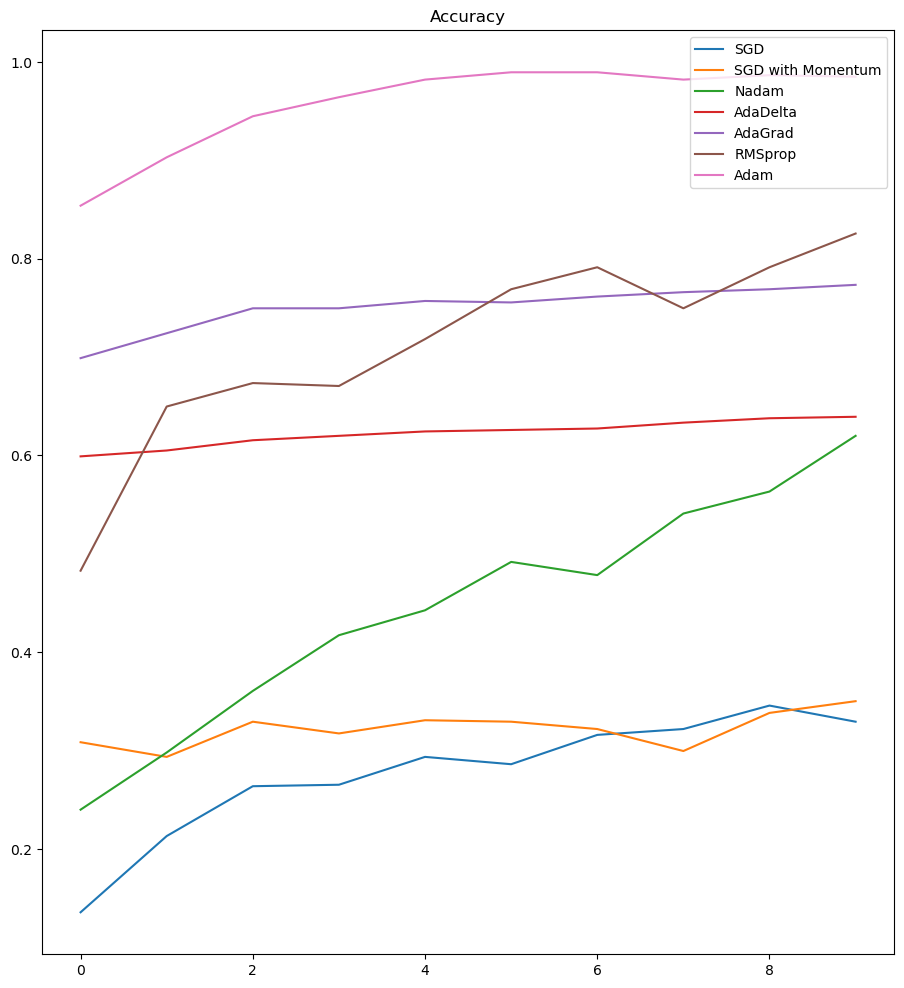

In [102]:
plt.figure(figsize= (11,12))
for i in range(7) :
    plt.plot(df['Accuracy'][i])
    plt.title("Accuracy")
    plt.legend(labels= df['Optimizer'], loc = 'upper right', fontsize = 10)
plt.savefig("Accuracy.png")
plt.show()

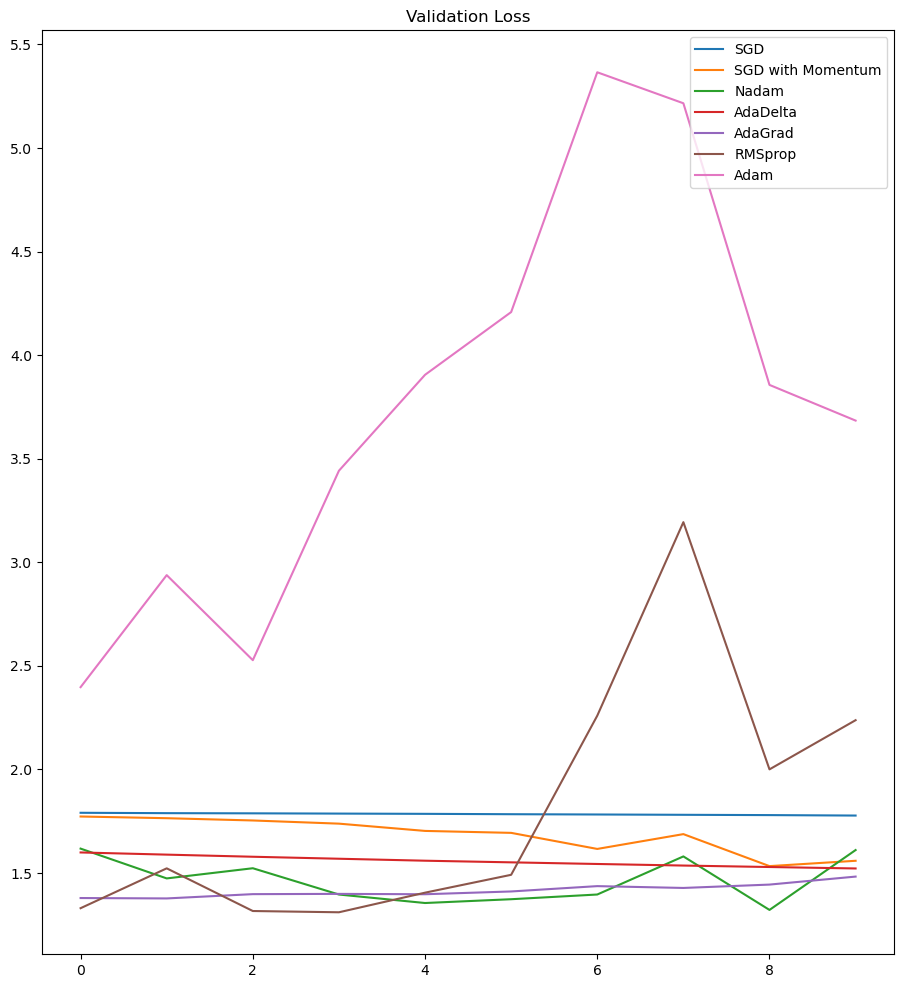

In [103]:
plt.figure(figsize= (11,12))
for i in range(7) :
    plt.plot(df['Val_Loss'][i])
    plt.title("Validation Loss")
    plt.legend(labels= df['Optimizer'], loc = 'upper right', fontsize = 10)
plt.savefig("Validation_Loss.png")
plt.show()

In [104]:
plt.figure(figsize= (11,12))
for i in range(7) :
    plt.plot(df['Val_Accuracy'][i])
    plt.title("Validation Accuracy")
    plt.legend(labels= df['Optimizer'], loc = 'upper right', fontsize = 10)
plt.savefig("Validation_Accuracy.png")
plt.show()